# Machine Learning - Tarea 2
---

---

<div style="text-align: right">
Vicente Lizana - 201310004-K
</div>
<div style="text-align: right">
Álvaro Valderrama - 201390005-4
</div>

---

In [40]:
import re
import nltk

import numpy as np
import pandas as pd
import seaborn as sns

from numpy import random as rnd
from urllib import request as req
from matplotlib import pyplot as plt

from sklearn import preprocessing as skpp
from sklearn import decomposition as skdc
from sklearn import discriminant_analysis as skda
from sklearn import neighbors as skng
from sklearn import metrics as skmt
from sklearn import naive_bayes as sknb
from sklearn import svm as sksvm
from sklearn import model_selection as skms
from sklearn import linear_model as sklm
from sklearn.feature_extraction import text as sktx

from imblearn import over_sampling as imbos

from nltk import corpus as nlcp
from nltk.stem import porter as nlpt

---

---
## 1.- Reducción de Dimensionalidad para Clasificación

---
### 1.a

#### Datos

In [2]:
train_data_url = "http://statweb.stanford.edu/~hastie/ElemStatLearn/datasets/vowel.train"
test_data_url = "http://statweb.stanford.edu/~hastie/ElemStatLearn/datasets/vowel.test"
train_data_f = req.urlretrieve(train_data_url, "train_data_1.csv")
test_data_f = req.urlretrieve(test_data_url, "test_data_1.csv")
train_df_1 = pd.DataFrame.from_csv('train_data_1.csv',header=0,index_col=0)
test_df_1 = pd.DataFrame.from_csv('test_data_1.csv',header=0,index_col=0)

In [3]:
n_train = train_df_1.shape[0]
print("Cantidad de datos (train) :", n_train)
train_df_1.head()

Cantidad de datos (train) : 528


,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
row.names,,,,,,,,,,,
1,1,-3.639,0.418,-0.670,1.779,-0.168,1.627,-0.388,0.529,-0.874,-0.814
2,2,-3.327,0.496,-0.694,1.365,-0.265,1.933,-0.363,0.510,-0.621,-0.488
3,3,-2.120,0.894,-1.576,0.147,-0.707,1.559,-0.579,0.676,-0.809,-0.049
4,4,-2.287,1.809,-1.498,1.012,-1.053,1.060,-0.567,0.235,-0.091,-0.795
5,5,-2.598,1.938,-0.846,1.062,-1.633,0.764,0.394,-0.150,0.277,-0.396


In [4]:
n_test = test_df_1.shape[0]
print("Cantidad de datos (test) :", n_test)
test_df_1.tail()

Cantidad de datos (test) : 462


,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
row.names,,,,,,,,,,,
458,7,-3.239,3.083,-1.427,-0.202,-0.282,1.421,0.576,0.068,-0.914,0.147
459,8,-3.753,3.605,-0.899,-0.747,-0.401,1.765,0.620,0.754,-0.835,-0.301
460,9,-3.980,2.459,0.068,0.023,0.237,1.029,-0.189,0.521,-0.773,-0.500
461,10,-4.264,2.925,0.065,0.794,0.323,0.515,-1.282,-0.140,-0.863,-0.390
462,11,-3.291,2.324,-0.679,0.285,0.441,0.557,-0.227,0.115,-1.046,0.697


El conjunto de entrenamiento tiene 528 datos y el conjunto de prueba tiene 462. Cada dato tiene 10 atributos.

In [5]:
for i in range(1, 12):
    n_class = train_df_1[train_df_1["y"]==i].shape[0]
    print("Promedio Clase {:<2}: {}".format(i, n_class/n_train))

Promedio Clase 1 : 0.09090909090909091
Promedio Clase 2 : 0.09090909090909091
Promedio Clase 3 : 0.09090909090909091
Promedio Clase 4 : 0.09090909090909091
Promedio Clase 5 : 0.09090909090909091
Promedio Clase 6 : 0.09090909090909091
Promedio Clase 7 : 0.09090909090909091
Promedio Clase 8 : 0.09090909090909091
Promedio Clase 9 : 0.09090909090909091
Promedio Clase 10: 0.09090909090909091
Promedio Clase 11: 0.09090909090909091


Todas las clases tienen la misma proporción $\left(\frac{1}{11}\right)$, por lo que los datos están equirepresentados.

---
### 1.b

#### Preprocesamiento

In [6]:
X_1 = train_df_1.loc[:,'x.1':'x.10'].values
y_1 = train_df_1.loc[:,'y'].values

sscaler = skpp.StandardScaler().fit(X_1)
X_1_std = sscaler.transform(X_1)

---
### 1.c

#### PCA (not even once)

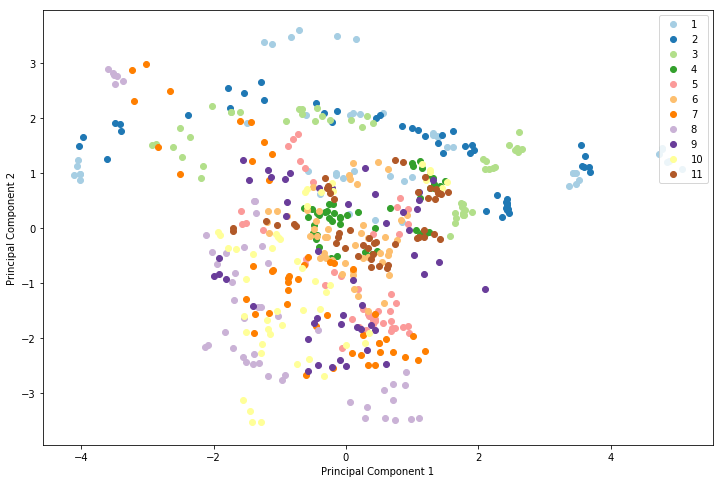

In [7]:
sklearn_pca = skdc.PCA(n_components=2)
Xred_pca = sklearn_pca.fit_transform(X_1_std)

paired_cmap = plt.cm.get_cmap('Paired')
mclasses=(1,2,3,4,5,6,7,8,9,10,11)
mcolors = [paired_cmap(i) for i in np.linspace(0,1,11)]

plt.figure(figsize=(12, 8))
for lab, col in zip(mclasses,mcolors):
    plt.scatter(Xred_pca[y_1==lab, 0],Xred_pca[y_1==lab, 1],label=lab,c=col)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
leg = plt.legend(loc='upper right', fancybox=True)
plt.show()

---
### 1.d

#### LDA

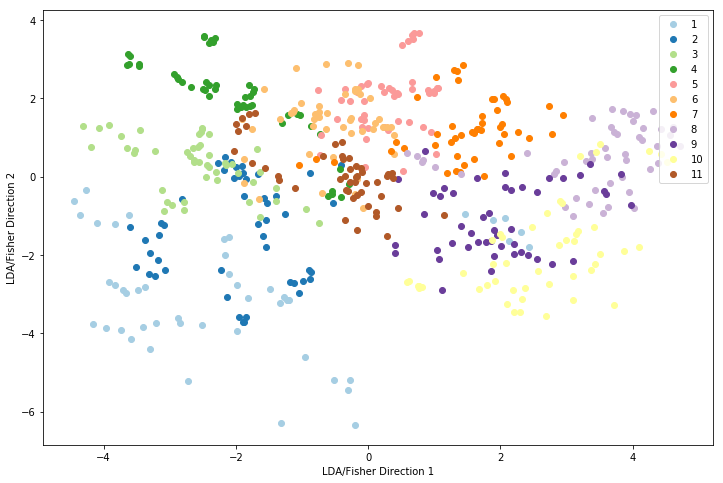

In [8]:
sklearn_lda = skda.LinearDiscriminantAnalysis(n_components=2)
Xred_lda = sklearn_lda.fit_transform(X_1_std,y_1)

plt.figure(figsize=(12, 8))
for lab, col in zip(mclasses,mcolors):
    plt.scatter(Xred_lda[y_1==lab, 0],Xred_lda[y_1==lab, 1],label=lab,c=col)
plt.xlabel('LDA/Fisher Direction 1')
plt.ylabel('LDA/Fisher Direction 2')
leg = plt.legend(loc='upper right', fancybox=True)
plt.show()

---
### 1.e

#### Comparación Cualitativa

De los gráficos podemos ver que si particionaramos el espacio en distintas regiones correspondientes a las diferentes clases, con _LDA_ tendríamos menos elementos mal clasificados que con _PCA_, ya que la superposición de elementos de diferentes clases es mucho menor.

Aparte, graficando los centros de gravedad de cada cluster, podemos ver que tan separadas quedan las clases.

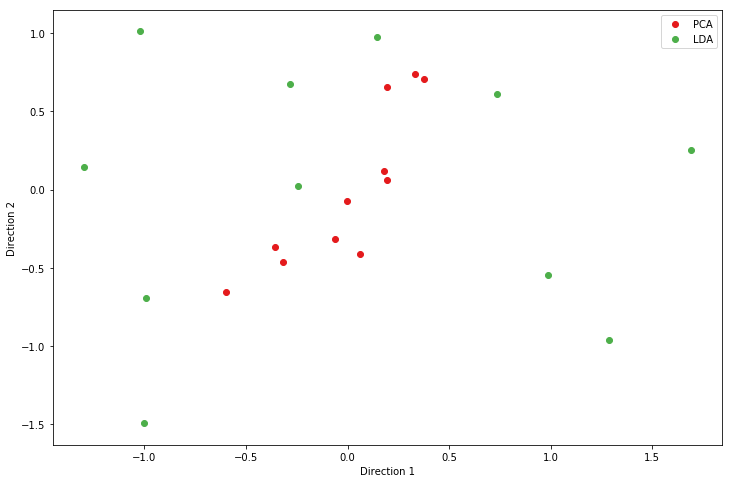

In [9]:
centers_pca = []
centers_lda = []

for lab in mclasses:
    centers_pca.append( np.sum(Xred_pca[y_1==lab], axis=0) /Xred_pca[y_1==lab].size )
    centers_lda.append( np.sum(Xred_lda[y_1==lab], axis=0) /Xred_lda[y_1==lab].size )
    
centers_pca = np.array(centers_pca)
centers_lda = np.array(centers_lda)

Set1_cmap = plt.cm.get_cmap('Set1')
green = Set1_cmap(0.25)
red = Set1_cmap(0)

plt.figure(figsize=(12, 8))
plt.scatter(centers_pca[:,0],centers_pca[:,1],label="PCA",c=red)
plt.scatter(centers_lda[:,0],centers_lda[:,1],label="LDA",c=green)
plt.xlabel('Direction 1')
plt.ylabel('Direction 2')
leg = plt.legend(loc='upper right', fancybox=True)
plt.show()

Podemos ver que los centros de _PCA_ se encuentran en una región mucho más acotada que los de _LDA_, lo cual no es deseable ya que si están más separados hay menos superposición.

---
### 1.f

#### Clasificador Aleatorio

---
### 1.g

#### LDA - QDA - Vecinos más Cercanos

LDA:
train score:  0.683712121212
test score :  0.443722943723

QDA:
train score:  0.988636363636
test score :  0.471861471861

KNN:


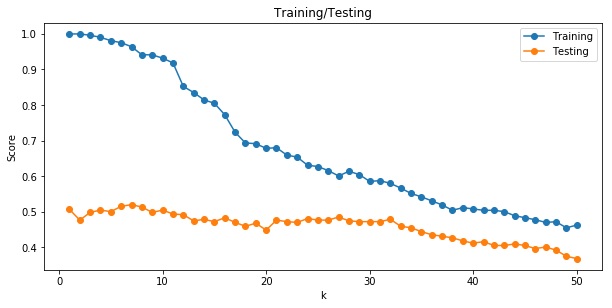

In [10]:
X_1_test = test_df_1.loc[:,'x.1':'x.10'].values
y_1_test = test_df_1.loc[:,'y'].values
X_1_std_test = sscaler.transform(X_1_test)

lda_model = skda.LinearDiscriminantAnalysis()
lda_model.fit(X_1_std,y_1)

print("LDA:")
print("train score: ", lda_model.score(X_1_std,y_1))
print("test score : ", lda_model.score(X_1_std_test,y_1_test))
print()

qda_model = skda.QuadraticDiscriminantAnalysis()
qda_model.fit(X_1_std,y_1)

print("QDA:")
print("train score: ", qda_model.score(X_1_std,y_1))
print("test score : ", qda_model.score(X_1_std_test,y_1_test))
print()

print("KNN:")
knn_scores_training = []
knn_scores_testing = []

k = range(1,51)
for c in k:
    knn_model = skng.KNeighborsClassifier(n_neighbors=c)
    knn_model.fit(X_1_std,y_1)
    knn_scores_training.append(knn_model.score(X_1_std,y_1))
    knn_scores_testing.append(knn_model.score(X_1_std_test,y_1_test))
    
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.xlabel("k")
plt.ylabel("Score")
plt.title("Training/Testing")
plt.plot(k,knn_scores_training, '-o',k,knn_scores_testing, '-o')
plt.legend(("Training", "Testing"), loc = "upper right")
plt.show()

---
### 1.h

#### Placeholder

---
### 1.i

#### Placeholder

---

---
## 2.- Análisis de Opiniones sobre Películas

---
### 2.a

#### Datos

In [11]:
train_data_url = "http://www.inf.utfsm.cl/~jnancu/stanford-subset/polarity.train"
test_data_url = "http://www.inf.utfsm.cl/~jnancu/stanford-subset/polarity.dev"

train_data_f = req.urlretrieve(train_data_url, "train_data_2.csv")
test_data_f = req.urlretrieve(test_data_url, "test_data_2.csv")

with open("train_data_2.csv", encoding='ISO-8859-1') as ftr:
    rows = [line.strip().split(" ",1) for line in ftr.readlines()]
    train_df_2 = pd.DataFrame(rows, columns=['Sentiment','Text'])
    train_df_2['Sentiment'] = pd.to_numeric(train_df_2['Sentiment'])

with open("test_data_2.csv", encoding='ISO-8859-1') as fts:
    rows = [line.strip().split(" ",1) for line in fts.readlines()]
    test_df_2 = pd.DataFrame(rows, columns=['Sentiment','Text'])
    test_df_2['Sentiment'] = pd.to_numeric(test_df_2['Sentiment'])

print(train_df_2.shape)
print(test_df_2.shape)

(3554, 2)
(3554, 2)


In [12]:
train_df_2.head()

,Sentiment,Text
0,-1,"everything's serious , poetic , earnest and --..."
1,-1,"narratively , trouble every day is a plodding ..."
2,1,a truly wonderful tale combined with stunning ...
3,1,jason patric and ray liotta make for one splen...
4,-1,haneke keeps us at arm's length . guided more ...


In [13]:
test_df_2.tail()

,Sentiment,Text
3549,1,a fascinating documentary about the long and e...
3550,1,the filmmakers' eye for detail and the high st...
3551,1,throwing caution to the wind with an invitatio...
3552,-1,"a big , baggy , sprawling carnival of a movie..."
3553,1,"an incendiary , deeply thought-provoking look ..."


---
### 2.b

#### Word extractor, Part I

In [14]:
def word_extractor(text):
    ps = nlpt.PorterStemmer()
    commonwords = nlcp.stopwords.words('english')
    commonwords.remove('not')
    
    text = re.sub(r'([a-z])\1+', r'\1\1', text)
    words = []
    wordtokens = [ps.stem(word.lower()) for word in nltk.word_tokenize(text)]
    
    for word in wordtokens:
        if word not in commonwords:
            words.append(word)
            
    return " ".join(words)

In [15]:
print(word_extractor("I love to eat cake"))
print(word_extractor("I love eating cake"))
print(word_extractor("I loved eating the cake"))
print(word_extractor("I do not love eating cake"))
print(word_extractor("I don't love eating cake"))

love eat cake
love eat cake
love eat cake
not love eat cake
n't love eat cake


---
### 2.c

#### Word extractor, Part II

In [16]:
def word_extractor2(text):
    wordlemmatizer = nltk.WordNetLemmatizer()
    commonwords = nlcp.stopwords.words('english')
    commonwords.remove('not')
    
    text = re.sub(r'([a-z])\1+', r'\1\1', text)
    words = []
    wordtokens = [wordlemmatizer.lemmatize(word.lower()) for word in nltk.word_tokenize(text)]
    
    for word in wordtokens:
        if word not in commonwords:
            words.append(word)
            
    return " ".join(words)

In [17]:
print(word_extractor2("I love to eat cake"))
print(word_extractor2("I love eating cake"))
print(word_extractor2("I loved eating the cake"))
print(word_extractor2("I do not love eating cake"))
print(word_extractor2("I don't love eating cake"))

love eat cake
love eating cake
loved eating cake
not love eating cake
n't love eating cake


---
### 2.d

#### Representación vectorial de los datos

In [18]:
texts_train = [word_extractor2(text) for text in train_df_2.Text]
texts_test = [word_extractor2(text) for text in test_df_2.Text]

vectorizer = sktx.CountVectorizer(ngram_range=(1, 1), binary='False')
vectorizer.fit(np.asarray(texts_train))

features_train = vectorizer.transform(texts_train)
features_test = vectorizer.transform(texts_test)

labels_train = np.asarray((train_df_2.Sentiment.astype(float)+1)/2.0)
labels_test = np.asarray((test_df_2.Sentiment.astype(float)+1)/2.0)

vocab = vectorizer.get_feature_names()
dist = list(np.array(features_train.sum(axis=0)).reshape(-1,))

for tag, count in zip(vocab, dist):
    print(count, tag)

6 10
4 100
2 101
1 105
2 10th
4 11
2 110
1 11th
1 12
2 13
1 13th
1 14
1 140
1 146
3 15
1 16
1 163
2 170
1 18th
4 19
2 1915
1 1934
1 1938
1 1940s
2 1950
1 1950s
1 1954
1 1955
1 1958
1 1959
2 1960s
1 1967
1 1972
3 1975
1 1978
1 1979
2 1980
1 1991
1 1992
2 1995
3 19th
4 20
2 2000
7 2002
4 20th
2 21st
1 22
1 24
2 25
1 25s
2 30
1 300
2 3000
1 30s
1 37
1 3d
5 40
1 400
1 401
1 40s
1 451
1 48
1 49
4 4ever
3 50
2 51
1 53
1 5ths
2 60s
1 65
1 65th
4 70s
1 71
1 77
1 78
1 79
4 80
1 800
3 80s
2 84
2 85
1 88
1 8th
13 90
1 90s
1 93
1 94
2 95
1 96
1 97
2 99
1 aaliyah
2 abandon
1 abandono
1 abbass
1 abbreviated
1 abc
2 abel
1 abhorrent
1 abiding
11 ability
6 able
3 ably
1 aboul
3 above
1 abrahams
1 abrams
1 abrasive
2 abroad
1 abruptly
2 absolute
7 absolutely
1 absorb
1 absorbed
10 absorbing
1 absorption
5 abstract
2 absurd
3 absurdist
4 absurdity
1 absurdly
1 aburrido
4 abuse
1 abysmally
1 acabamos
1 academic
2 academy
7 accent
1 accentuating
2 accept
1 accepting
10 accessible
2 accident
1 accidental
1

4 buff
1 buffeted
1 buffoon
1 buffoonery
1 buggy
1 bui
10 build
2 building
5 built
1 bull
3 bullet
1 bullfighter
5 bullock
1 bullwinkle
1 bumbling
1 bump
1 bumper
5 bunch
1 bundy
2 buoyant
1 burdette
3 burger
3 buried
2 burke
5 burn
1 burnt
2 burr
2 burst
1 burstein
1 bursting
2 bus
1 buscemi
1 bush
8 business
2 bust
1 busting
1 bustling
3 busy
1 butler
1 butt
1 butterfingered
1 butterworth
2 button
6 buy
1 buyers
1 buying
1 buzz
2 buñuel
8 by
1 byatt
1 bygone
2 byler
1 bypass
1 byron
41 ca
1 cabin
3 cable
1 cackle
1 cacophony
1 cacoyannis
1 cada
1 caddyshack
2 caesar
1 cafe
1 caffeinated
1 café
5 cage
1 cahill
7 caine
1 cal
1 calamity
1 calcified
4 calculated
3 calculating
2 caliber
2 calibrated
1 california
17 call
3 callar
7 called
2 calling
1 callow
1 calvin
1 camaraderie
1 camareras
3 came
4 cameo
15 camera
1 cameron
3 camouflage
8 camp
1 campanella
1 campfire
1 campion
1 campus
1 campy
2 canada
1 canadian
2 cancer
1 candidly
1 candle
3 candy
3 canned
2 cannes
1 canning
3 canny
1 

1 dreamlike
1 dreamscape
4 dreary
2 dreck
1 drek
2 drenched
2 dress
2 dressed
2 drew
2 drift
4 drink
1 drinker
1 drip
11 drive
2 drivel
4 driven
1 driver
3 driving
1 droll
1 drone
1 drooling
4 drop
3 drowned
1 drowsy
6 drug
2 drum
2 drumline
1 drumming
3 drunk
2 drunken
9 dry
1 du
1 dual
1 dubbed
1 dubious
2 duck
1 duct
6 dud
1 duddy
1 dude
7 due
2 duke
20 dull
1 dulled
1 dullest
1 dullness
3 duma
20 dumb
2 dumbed
2 dumber
1 dumbfoundingly
1 dumbness
1 dummy
1 dumped
1 dunce
1 dungeon
1 dungpile
1 dupe
1 duplicate
1 duración
1 dust
1 dustbin
1 dustin
1 dusty
1 dutiful
1 dutifully
3 duty
2 duvall
3 dvd
2 dwarf
1 dwell
1 dweller
1 dwindles
1 dy
4 dying
1 dylan
3 dynamic
1 dynamism
1 dynamite
3 dysfunctional
1 dysfunctionally
1 dyspeptic
1 dystopian
2 ear
3 earlier
5 early
3 earn
12 earnest
1 earnestly
1 earnestness
1 earnhart
1 earns
8 earth
1 earthly
1 earthshaking
1 earthy
3 ease
3 easier
13 easily
2 east
1 easter
1 eastern
3 eastwood
24 easy
1 eat
1 eats
1 ebullient
6 eccentric
4 ecce

1 hermetic
1 hermocrates
16 hero
1 heroic
3 heroine
4 herzog
2 hewitt
4 hey
1 heyday
1 hiatus
1 hibiscus
2 hick
1 hickenlooper
1 hidden
3 hide
1 hidebound
1 hideously
1 hiding
1 hierarchy
32 high
2 higher
3 highest
1 highlander
1 highlight
8 highly
1 highway
1 hijack
12 hilarious
1 hilariously
3 hilarity
1 hile
7 hill
1 hindsight
1 hinge
1 hinged
2 hint
11 hip
3 hipness
1 hippopotamus
1 hired
1 hiss
1 historia
11 historical
26 history
1 histrionic
1 histrionics
1 histórica
22 hit
1 hitchcock
2 hitler
2 hitman
5 hitting
1 hiv
1 hjelje
2 ho
1 hoary
1 hobbled
1 hobnail
1 hodgepodge
6 hoffman
1 hoity
2 hokey
4 hokum
14 hold
1 holden
10 hole
7 holiday
2 hollow
1 hollowness
2 holly
46 hollywood
5 holm
3 holocaust
1 holofcener
1 holographic
3 holy
4 homage
20 home
1 homespun
1 homicide
1 homiletic
1 homo
1 homogenized
1 homophobia
1 homosexual
1 homosexuality
2 honed
18 honest
3 honestly
5 honesty
1 honey
5 hong
3 honor
1 hood
6 hop
16 hope
2 hoped
3 hopeful
1 hopefully
2 hopeless
1 hopelessl

1 murk
1 murkiest
4 murky
6 murphy
2 muse
1 museum
1 mush
1 mushy
28 music
9 musical
3 musician
1 musing
2 musketeer
1 musset
16 must
1 musty
1 mute
4 muted
1 muting
1 muttering
1 muzak
1 myriad
3 mysterious
19 mystery
2 mystical
1 mystifying
2 mythic
3 mythology
1 más
1 münch
1 nachtwey
1 nadir
1 nail
1 nailbiter
4 nair
1 naiveté
1 nakata
1 nakedness
1 nalin
12 name
3 named
1 namely
1 nanosecond
1 naomi
2 nap
1 napoleon
1 naptime
4 narc
2 narcissism
1 narcissist
1 narcotic
2 narrated
1 narration
23 narrative
2 narratively
1 narrator
1 narrow
6 nasty
1 natalie
5 nation
3 national
1 nationalist
2 native
1 natter
8 natural
2 naturalism
1 naturalistic
1 naturally
9 nature
2 natured
1 naturedness
2 naughty
1 nauseating
1 nauseatingly
1 nazi
1 naïf
12 near
16 nearly
2 neat
1 neatly
1 nebrida
4 necessarily
8 necessary
1 neck
26 need
5 needed
1 needle
2 needlessly
2 needy
1 neeson
1 negar
2 negative
1 neglect
2 neglected
1 neglecting
1 negligible
1 negotiate
2 neighborhood
2 neil
1 neill
18 n

1 rigorous
8 ring
1 ringing
1 ringu
1 riot
3 rip
3 ripe
1 ripoff
2 ripper
1 risa
9 rise
4 rising
2 risk
2 risky
2 ritchie
1 rite
1 ritmo
2 rival
1 rivalry
1 river
2 riveted
7 riveting
12 road
1 roadside
1 roar
2 roaring
3 rob
11 robert
2 roberto
2 robin
1 robust
13 rock
1 rockwell
1 rocky
1 rodrigues
4 rodriguez
5 roger
4 rohmer
1 rohypnol
1 roiling
1 roland
19 role
6 roll
2 rolled
3 roller
1 rollerball
1 rollicking
3 rolling
6 roman
20 romance
1 romanek
39 romantic
1 romanticism
1 romero
1 romijn
1 romoli
2 romp
1 ron
9 room
7 root
1 rooted
4 rooting
1 rope
1 rosa
1 rosario
4 rose
1 ross
1 roster
4 rote
1 rotten
1 rouge
2 rough
1 roughage
2 roughly
2 roughshod
1 rounded
3 rousing
1 roussillon
1 route
7 routine
1 rover
3 rowdy
1 rowling
1 royally
1 rubbo
1 rubenesque
1 rubin
4 rude
1 rueful
1 ruffle
2 rug
1 rugrats
2 ruin
1 ruined
4 rule
1 rumbling
2 rumor
23 run
2 runner
9 running
1 runyon
1 rural
2 rush
1 rushed
4 russell
3 russian
2 russos
1 ruthless
1 ruthlessly
1 ruthlessness
4 ry

1 theron
1 thesis
2 they
1 thi
6 thick
1 thievery
13 thin
83 thing
32 think
5 thinking
3 thinly
1 thinner
5 third
2 thirst
2 thirsty
3 thirteen
3 thirty
1 this
2 thomas
1 thorn
1 thornberrys
1 thorough
12 thoroughly
55 though
18 thought
14 thoughtful
1 thoughtfully
2 thoughtfulness
5 thousand
1 thrashing
1 threadbare
2 threat
2 threatening
28 three
1 threefold
1 threshold
1 threw
11 thrill
1 thrilled
47 thriller
5 thrilling
1 thrillingly
1 thrives
2 throat
9 throughout
8 throw
2 throwaway
4 throwing
1 thrown
1 thru
3 thrust
2 thumb
1 thumpingly
2 tian
2 tick
4 ticket
1 ticking
1 tickle
1 tickled
1 tidal
4 tie
1 tiempos
1 tiene
1 tiger
3 tight
1 tightening
2 tightly
2 tightrope
1 til
1 till
2 tim
143 time
1 timeframe
1 timeless
5 timely
2 timer
1 timewaster
2 timid
3 timing
1 tiniest
1 tinsel
1 tinseltown
1 tinted
3 tiny
9 tired
6 tiresome
1 tiring
1 tiro
3 tissue
1 tit
1 titan
1 titillating
31 title
1 titled
1 titular
8 to
1 toast
2 toback
7 today
4 todd
1 toddler
1 todo
1 todos
3 toe


---
### 2.e

#### Evaluar el desempeño

In [19]:
def score_the_model(model, x, y, xt, yt, text):
    acc_tr = model.score(x, y)
    acc_test = model.score(xt[:-1], yt[:-1])
    
    print("Train Accuracy {}: {}".format(text, acc_tr))
    print("Test Accuracy {} : {}".format(text, acc_test))
    print("Detailed Analysis Testing Results:")
    print(skmt.classification_report(yt, model.predict(xt), target_names=['+','-']))

---
### 2.f

#### Naive Bayes

In [20]:
def do_NAIVE_BAYES(x, y, xt, yt):
    model = sknb.BernoulliNB()
    model = model.fit(x, y)
    score_the_model(model, x, y, xt, yt, "BernoulliNB")
    return model

In [21]:
model = do_NAIVE_BAYES(features_train, labels_train, features_test, labels_test)
test_pred = model.predict_proba(features_test)
spl = rnd.randint(len(test_pred), size=15)

for text, sentiment in zip(test_df_2.Text[spl], test_pred[spl]):
    print(sentiment, text)

Train Accuracy BernoulliNB: 0.9589195272931907
Test Accuracy BernoulliNB : 0.7379679144385026
Detailed Analysis Testing Results:
             precision    recall  f1-score   support

          +       0.75      0.72      0.74      1803
          -       0.73      0.75      0.74      1751

avg / total       0.74      0.74      0.74      3554

[ 0.00738607  0.99261393] young hanks and fisk , who vaguely resemble their celebrity parents , bring fresh good looks and an ease in front of the camera to the work .
[ 0.0012871  0.9987129] an honest , sensitive story from a vietnamese point of view .
[ 0.24862728  0.75137272] frida isn't that much different from many a hollywood romance . what sets it apart is the vision that taymor , the avant garde director of broadway's the lion king and the film titus , brings .
[ 0.21203848  0.78796152] summer's far too fleeting to squander on offal like this .
[ 0.28166431  0.71833569] a big-budget/all-star movie as unblinkingly pure as the hours is a dist

---
### 2.g

#### SVM

In [22]:
def do_SVM(x, y, xt, yt):
    Cs = np.logspace(-2, 4, 7)
    
    for C in Cs:
        print("C value: {}".format(C))
        model = sksvm.LinearSVC(C=C)
        model = model.fit(x, y)
        score_the_model(model, x, y, xt, yt, "SVM")

In [23]:
do_SVM(features_train, labels_train, features_test, labels_test)

C value: 0.01
Train Accuracy SVM: 0.8851997749015195
Test Accuracy SVM : 0.7162960878131157
Detailed Analysis Testing Results:
             precision    recall  f1-score   support

          +       0.72      0.72      0.72      1803
          -       0.71      0.71      0.71      1751

avg / total       0.72      0.72      0.72      3554

C value: 0.1
Train Accuracy SVM: 0.9898705683736635
Test Accuracy SVM : 0.7247396566282015
Detailed Analysis Testing Results:
             precision    recall  f1-score   support

          +       0.73      0.72      0.73      1803
          -       0.72      0.73      0.72      1751

avg / total       0.72      0.72      0.72      3554

C value: 1.0
Train Accuracy SVM: 1.0
Test Accuracy SVM : 0.7151702786377709
Detailed Analysis Testing Results:
             precision    recall  f1-score   support

          +       0.73      0.71      0.72      1803
          -       0.71      0.72      0.71      1751

avg / total       0.72      0.72      0.72   

---

---
## 3.- Fraude en Transacciones Bancarias

---
### 3.a

#### Cantidad de elementos por clase

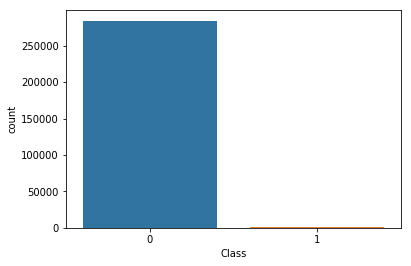

In [25]:
dt = pd.read_csv("creditcard.csv", header=0)
sns.countplot("Class", data=dt)
plt.show()

---
### 3.b

#### Estandarización

In [26]:
dt["nAmount"] = skpp.StandardScaler().fit_transform(dt["Amount"].values.reshape(-1,1))
dt.drop(["Time", "Amount"], axis=1, inplace=True)
dt.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,nAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


---
### 3.c

#### Modelo y Matriz de Confusión

In [27]:
def model(model, features_train, features_test, labels_train, labels_test):
    clf = model
    clf.fit(features_train, labels_train.values.ravel())
    pred = clf.predict(features_test)
    
    cnf_matrix = skmt.confusion_matrix(labels_test, pred)
    recall = cnf_matrix[1,1] / (cnf_matrix[1,1] + cnf_matrix[1,0])
    print("The recall for this model is:", recall)
    
    fig = plt.figure(figsize=(6,3))
    print("TP:", cnf_matrix[1,1])
    print("TN:", cnf_matrix[0,0])
    print("FP:", cnf_matrix[0,1])
    print("FN:", cnf_matrix[1,0])
    
    sns.heatmap(cnf_matrix, cmap="coolwarm_r", annot=True, linewidths=0.5)
    plt.title("Confussion Matrix")
    plt.xlabel("Predicted Class")
    plt.ylabel("Real Class")
    plt.show()
    
    print()
    print("Classification Report:")
    print(skmt.classification_report(labels_test, pred))
    
    ''' You have to complete this function, ROC Curve is missing '''

---
### 3.d

#### Preparación de los datos

In [36]:
def data_preparation(x):
    x_features = x.iloc[:,x.columns != "Class"]
    x_labels = x.iloc[:,x.columns == "Class"]
    x_train, x_test, y_train, y_test = skms.train_test_split(x_features, x_labels, test_size=0.3)
    
    print("Length of training data: {}".format(len(x_train)))
    print("Length of test data: {}".format(len(x_test)))
    return(x_train,x_test,y_train,y_test)

---
### 3.e

#### Undersample

In [30]:
def undersample(data,times):
    fraud_indices = np.array(data[data.Class==1].index)
    normal_indices = np.array(data[data.Class==0].index)
    
    Count_Normal_transacation = len(data[data["Class"]==0])
    Count_Fraud_transacation = len(data[data["Class"]==1])
    
    Normal_indices_undersample = np.array(
        np.random.choice(
            normal_indices,
            (times*Count_Fraud_transacation),
            replace=False
        )
    )
    
    undersample_data = np.concatenate([fraud_indices,Normal_indices_undersample])
    undersample_data = data.iloc[undersample_data,:]
    
    normal = len(undersample_data[undersample_data.Class==0]) / len(undersample_data["Class"])
    print("The normal transacation proportion is : {}".format(normal))
    
    fraud = len(undersample_data[undersample_data.Class==1]) / len(undersample_data["Class"])
    print("The fraud transacation proportion is : {}".format(fraud))
    
    return(undersample_data)

---
### 3.f

#### Logistic Regression y Undersample

Length of training data: 199364
Length of test data: 85443
The undersample data for 1 proportion

The normal transacation proportion is : 0.5
The fraud transacation proportion is : 0.5

----------------------Validation Set------------------------

The model classification for 1 proportion

Length of training data: 498
Length of test data: 214
The recall for this model is: 0.901785714286
TP: 101
TN: 98
FP: 4
FN: 11


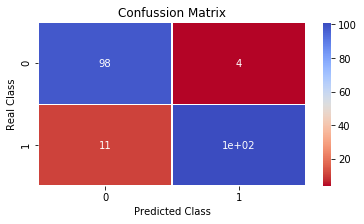


Classification Report:
             precision    recall  f1-score   support

          0       0.90      0.96      0.93       102
          1       0.96      0.90      0.93       112

avg / total       0.93      0.93      0.93       214

--------------------------Testing Set---------------------------
The recall for this model is: 0.911764705882
TP: 124
TN: 81721
FP: 3586
FN: 12


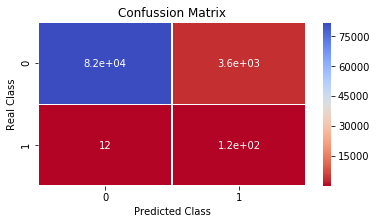


Classification Report:
             precision    recall  f1-score   support

          0       1.00      0.96      0.98     85307
          1       0.03      0.91      0.06       136

avg / total       1.00      0.96      0.98     85443

---------------------------------------------------------------
The undersample data for 2 proportion

The normal transacation proportion is : 0.6666666666666666
The fraud transacation proportion is : 0.3333333333333333

----------------------Validation Set------------------------

The model classification for 2 proportion

Length of training data: 747
Length of test data: 321
The recall for this model is: 0.885416666667
TP: 85
TN: 220
FP: 5
FN: 11


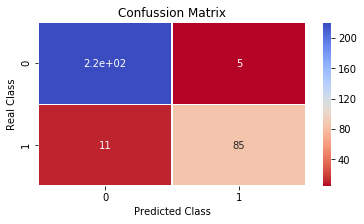


Classification Report:
             precision    recall  f1-score   support

          0       0.95      0.98      0.96       225
          1       0.94      0.89      0.91        96

avg / total       0.95      0.95      0.95       321

--------------------------Testing Set---------------------------
The recall for this model is: 0.911764705882
TP: 124
TN: 83414
FP: 1893
FN: 12


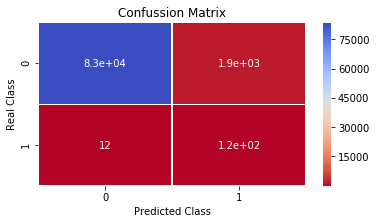


Classification Report:
             precision    recall  f1-score   support

          0       1.00      0.98      0.99     85307
          1       0.06      0.91      0.12       136

avg / total       1.00      0.98      0.99     85443

---------------------------------------------------------------
The undersample data for 3 proportion

The normal transacation proportion is : 0.75
The fraud transacation proportion is : 0.25

----------------------Validation Set------------------------

The model classification for 3 proportion

Length of training data: 996
Length of test data: 428
The recall for this model is: 0.864406779661
TP: 102
TN: 309
FP: 1
FN: 16


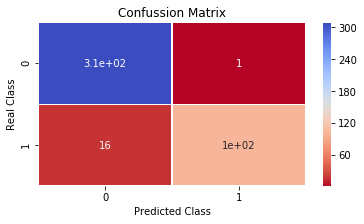


Classification Report:
             precision    recall  f1-score   support

          0       0.95      1.00      0.97       310
          1       0.99      0.86      0.92       118

avg / total       0.96      0.96      0.96       428

--------------------------Testing Set---------------------------
The recall for this model is: 0.897058823529
TP: 122
TN: 84285
FP: 1022
FN: 14


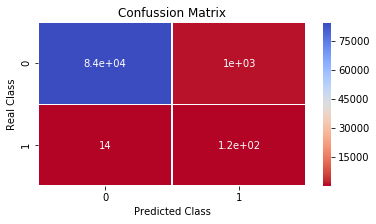


Classification Report:
             precision    recall  f1-score   support

          0       1.00      0.99      0.99     85307
          1       0.11      0.90      0.19       136

avg / total       1.00      0.99      0.99     85443

---------------------------------------------------------------


In [37]:
x_tr, x_ts, y_tr, y_ts = data_preparation(dt)
x_tr["Class"] = y_tr["Class"]
x_tr = x_tr.reset_index(drop=True)

for i in range(1,4):
    print("The undersample data for {} proportion".format(i), end='\n\n')
    Undersample_data = undersample(x_tr,i)
    print()
    print("----------------------Validation Set------------------------", end='\n\n')
    print("The model classification for {} proportion".format(i), end='\n\n')
    
    under_x, under_xt, under_yx, under_yxt = data_preparation(Undersample_data)
    clf = sklm.LogisticRegression()
    model(clf, under_x, under_xt, under_yx, under_yxt)
    print("--------------------------Testing Set---------------------------")
    model(clf, under_x, x_ts, under_yx, y_ts)
    print("---------------------------------------------------------------")

---
### 3.g

#### Oversampling y SMOTE

In [41]:
os = imbos.SMOTE(random_state=0)
os_data_X, os_data_y = os.fit_sample(x_tr,y_tr)

/home/vlizana/u/machine-learning/env/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


---

---

---